In [1]:
#Nguyen Si Nguyen HW 5 - 004870721
#There are multiple models used in this homework. I have tried:
# linear regression, lease squared regression, and random Forest regression.
# However, the best model that yield the highest R-Squared value is the random Forest regrestion
# which is at 0.89. Therefore,  I will use this model to provide the predicted
# solubility value on the provided test set.

#pre-processing will be done using BoxCox to normalize the training/test data sets.
#train control was used for repeatedcv and cv. There was no performance difference between the two.

#The final R-Squared is at 0.8942460

In [8]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")
if (not.installed("AppliedPredictiveModeling")) install.packages("AppliedPredictiveModeling", repos="http://cran.us.r-project.org")
if (not.installed("lars")) install.packages("lars", repos="http://cran.us.r-project.org")
if (not.installed("VIF")) install.packages("VIF", repos="http://cran.us.r-project.org")
if (not.installed("superpc")) install.packages("superpc", repos="http://cran.us.r-project.org")
if (not.installed("kernlab")) install.packages("kernlab", repos="http://cran.us.r-project.org")
if (not.installed("LogicReg")) install.packages("LogicReg", repos="http://cran.us.r-project.org")
if (not.installed("arm")) install.packages("arm", repos="http://cran.us.r-project.org")
if (not.installed("randomForest")) install.packages("randomForest", repos="http://cran.us.r-project.org")
if (not.installed("enpls")) install.packages("enpls", repos="http://cran.us.r-project.org")
if (not.installed("ranger")) install.packages("ranger", repos="http://cran.us.r-project.org")
if (not.installed("e1071")) install.packages("e1071", repos="http://cran.us.r-project.org")


library(lattice)
library(ggplot2)
library(caret)
library(ISLR)
library(AppliedPredictiveModeling)
library(lars)
library(pls)
library(MASS)
library(VIF)
library(superpc)
library(kernlab)
library(LogicReg)
library(arm)
#library(randomForest)
library(enpls)
library(ranger)
library(e1071)
library(DAAG)

In [9]:
MY_UID = 004870721 ########## you must enter your UCLA UID here !!!

set.seed( MY_UID )

In [10]:
training_set = data.matrix(read.csv( 'training_set.csv', header=TRUE ))
test_set = data.matrix(read.csv( 'test_set.csv', header=TRUE ))

In [11]:
my.training.set = transform(training_set)
my.test.set = transform(test_set)

In [12]:
my.training.set.X = my.training.set
my.training.set.Y = my.training.set$solubility
my.training.set.X$solubility = NULL




#need pre-processing here for training set data.
preProcValues = preProcess(my.training.set.X, c("center", "scale", "BoxCox"))
my.training.set.X.transformed = predict(preProcValues, my.training.set.X)
my.training.set.X.transformed$solubility = my.training.set.Y




In [13]:
my.test.set.X = my.test.set
#need pre-processing here for test set data.

preProcValues_testSet = preProcess(my.test.set.X, c("center", "scale", "BoxCox"))
my.test.set.X.transformed = predict(preProcValues_testSet, my.test.set.X)

In [14]:
head(my.test.set.X.transformed)

FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,⋯,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
1.0340283,0.8914372,-0.8416296,0.8662763,0.8174515,-0.7077257,-0.7189507,1.3334283,-0.6578861,2.0601606,⋯,0.9501279,-0.6530765,1.6183168,-0.2779411,-0.4100212,-0.4861177,1.3387487,0.51910068,1.3235122,1.0845481
-0.9636863,0.8914372,1.1839874,-1.1503014,0.8174515,-0.7077257,-0.7189507,1.3334283,-0.6578861,2.0601606,⋯,0.2319676,-0.6530765,-0.3100831,-0.2779411,-0.4100212,-0.4861177,-0.2860574,-0.19997858,-0.4453957,-0.4938719
-0.9636863,0.8914372,-0.8416296,-1.1503014,0.8174515,-0.7077257,-0.7189507,-0.7473059,-0.6578861,-0.4836899,⋯,-0.1818511,1.0803228,-0.9528830,-0.2779411,-0.4100212,-0.4861177,0.5263456,-0.05674385,-0.1704780,-0.2485592
-0.9636863,0.8914372,-0.8416296,-1.1503014,0.8174515,-0.7077257,-0.7189507,-0.7473059,1.5146679,-0.4836899,⋯,-0.6515565,-0.6530765,-0.9528830,-0.2779411,0.2553846,0.7746807,-0.2860574,-0.64776200,-1.1035713,-1.0811707
1.0340283,-1.1178340,1.1839874,0.8662763,-1.2190067,-0.7077257,1.3860184,-0.7473059,-0.6578861,-0.4836899,⋯,-0.4082838,-0.6530765,0.3327169,-0.2779411,-0.4100212,-0.4861177,-1.0984604,-0.68219860,-0.2479105,-0.3176532
-0.9636863,0.8914372,-0.8416296,-1.1503014,0.8174515,-0.7077257,-0.7189507,-0.7473059,1.5146679,-0.4836899,⋯,0.6060884,-0.6530765,-0.9528830,-0.2779411,4.2478192,3.9266766,0.5263456,-0.55187759,-1.1035713,-1.0811707


In [223]:
#using train()
fitControl = trainControl(#k-fold CV
                         method = "repeatedcv",
                         number = 10,
                          ## repeated ten times
                         repeats = 10,
                         classProbs = FALSE)

In [224]:
lm_Fit1 = suppressWarnings(train(solubility ~ ., data=my.training.set.X.transformed, 
                 method = "lm", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE))
lm_Fit1

Linear Regression 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 769, 771, 770, 769, 769, 769, ... 
Resampling results:

  RMSE       Rsquared 
  0.7739809  0.8584938

Tuning parameter 'intercept' was held constant at a value of TRUE

Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”

Warning message in cv.lm(my.training.set.X.transformed, lm.allpred, m = 10, dots = FALSE, :
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”

mean squared error (lower the better):  0.6099082 


[1] 0.6099082

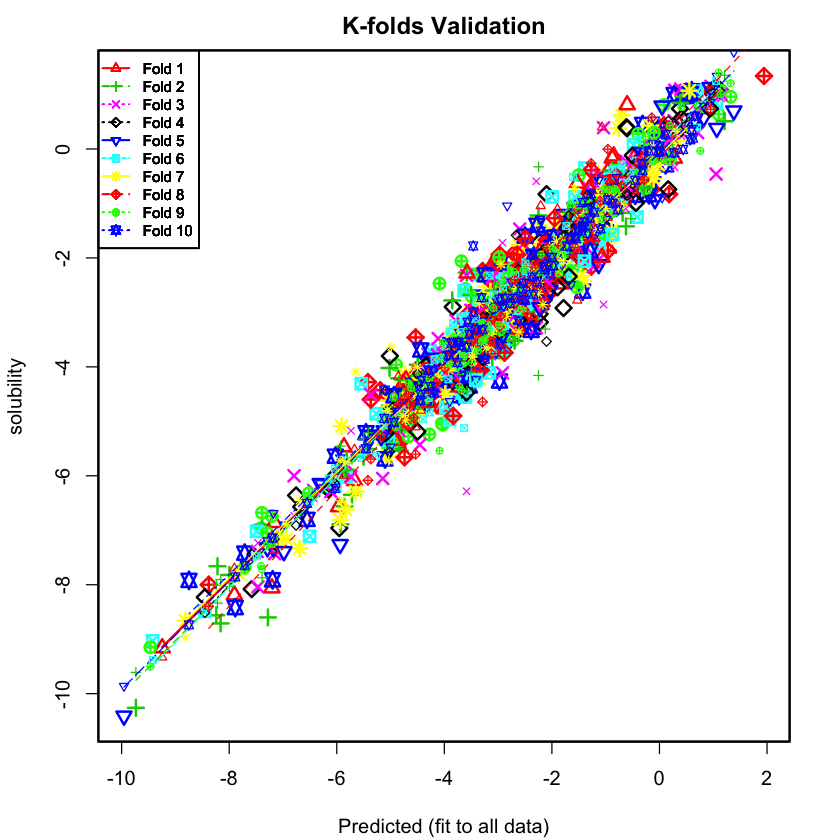

In [ ]:
lm.pred = predict(lm_Fit1,my.training.set.X.transformed)
lm.test_pred = predict(lm_Fit1, my.test.set.X.transformed)

In [227]:
head(lm.test_pred)

1         2         3         4         5         6 
-2.765688 -2.075833 -1.865472 -3.450859 -1.588411 -8.130195

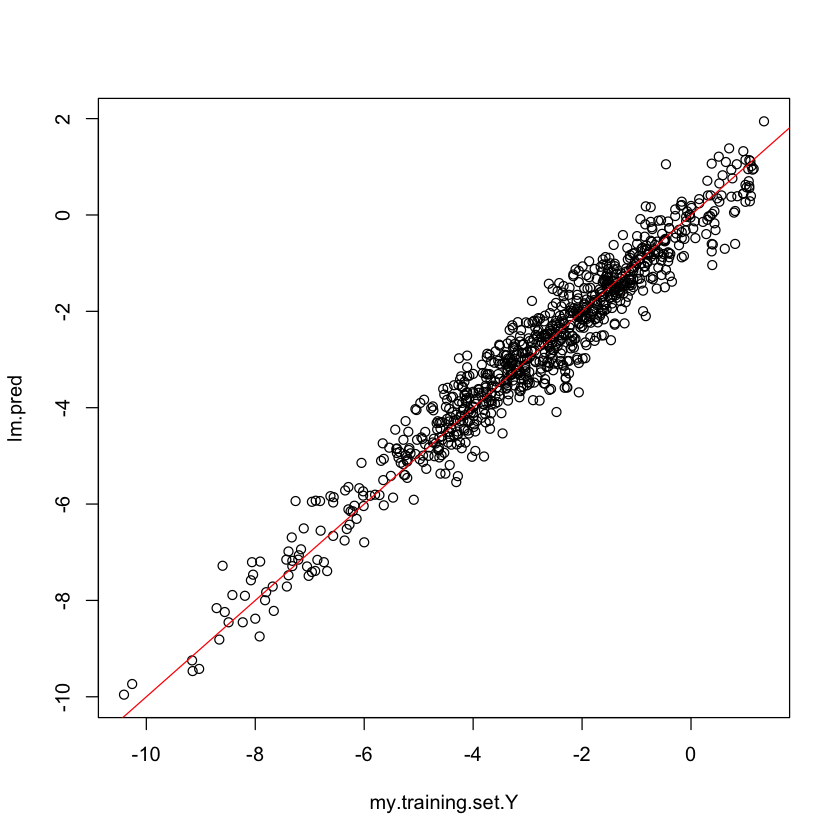

In [228]:
plot(my.training.set.Y, lm.pred)
abline(0,1,col="red")

In [229]:
#using train() for partial least squares regression
pls_Fit1 = suppressWarnings(train(solubility ~ ., data=my.training.set.X.transformed, 
                 method = "pls", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE))
pls_Fit1

Partial Least Squares 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 770, 768, 771, 770, 769, 770, ... 
Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared 
  1      1.2469979  0.6259114
  2      1.0145303  0.7534844
  3      0.9091144  0.8018618

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was ncomp = 3.

In [230]:
pls.pred = predict(pls_Fit1,my.training.set.X.transformed)
pls.test_pred = predict(pls_Fit1, my.test.set.X.transformed)

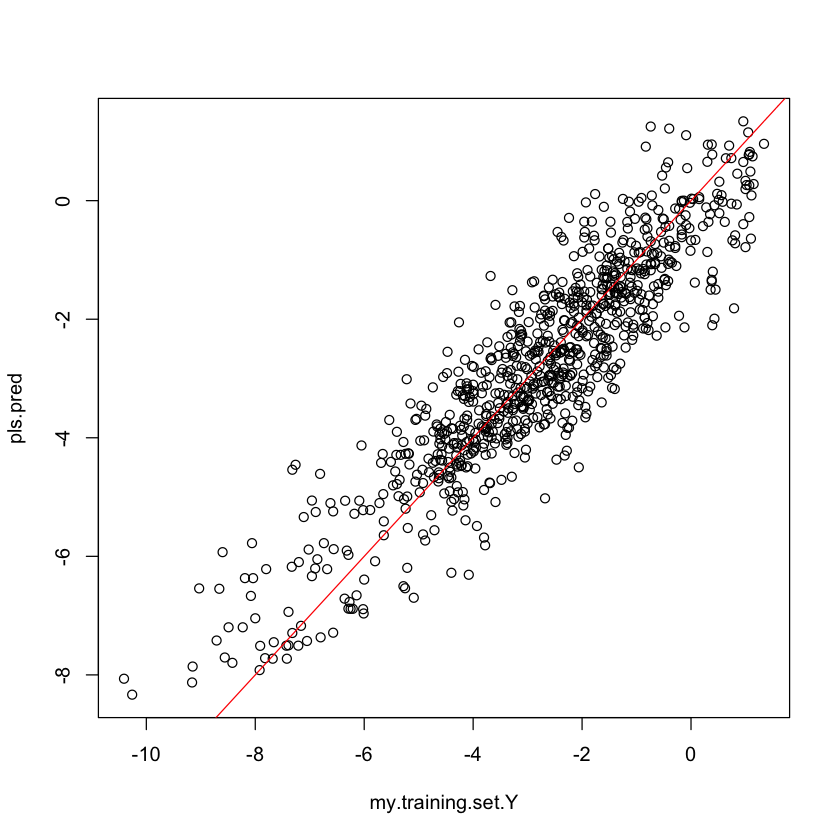

In [231]:
plot(my.training.set.Y, pls.pred)
abline(0,1,col="red")

In [232]:
#using train() for SVM regression
rf_Fit1 = train(solubility ~ ., data=my.training.set.X.transformed, 
                 method = "ranger", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE)



In [175]:
rf_Fit1

Random Forest 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 769, 770, 770, 769, 769, 770, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared 
    2   1.0599867  0.8228349
  115   0.6662338  0.8942460
  228   0.6713005  0.8921432

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 115.

In [233]:
rf.pred = predict(glm_Fit1,my.training.set.X.transformed)
rf.test_pred = predict(glm_Fit1, my.test.set.X.transformed)

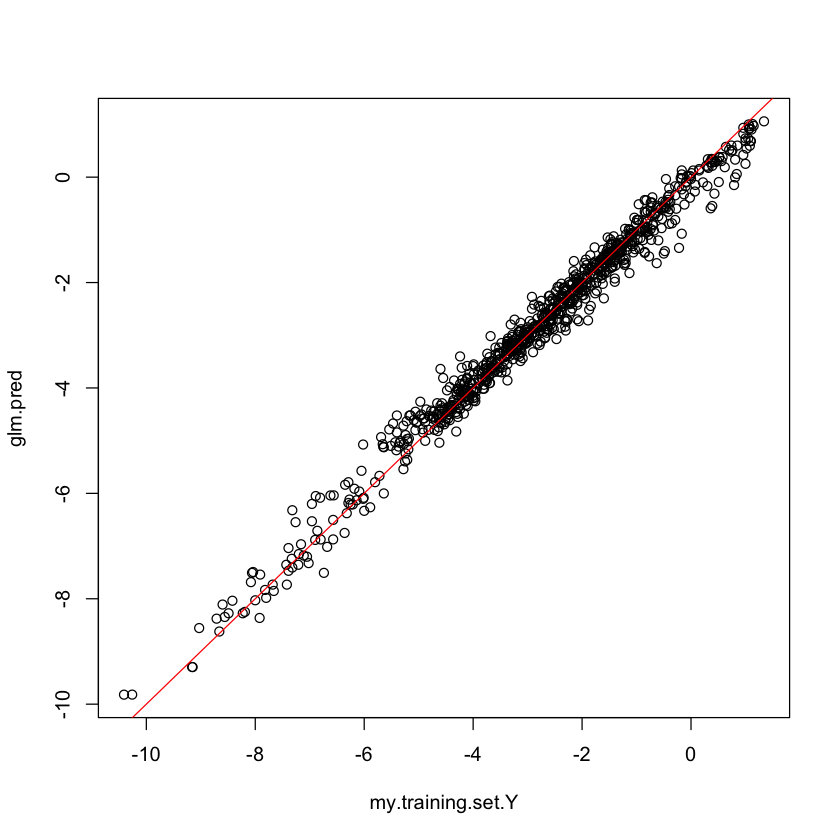

In [234]:
plot(my.training.set.Y, glm.pred)
abline(0,1,col="red")

In [178]:
#head(t(rf.test_pred))

In [235]:
cat('solubility','\n')
for(i in rf.test_pred){
    cat(i, '\n')
}

solubility 
-2.924542 
-2.18656 
-1.677566 
-3.340506 
-1.381725 
-8.249032 
-1.403438 
-4.852097 
-0.293721 
-1.510054 
0.296772 
-2.173346 
-3.493216 
-2.055113 
-1.5329 
-2.242636 
-2.18656 
-1.858566 
-1.423773 
-4.394698 
-1.525527 
-2.915348 
-0.959102 
0.4850623 
-5.713717 
-6.711454 
-1.534625 
-1.185092 
-0.3975087 
-0.354055 
-0.625948 
-3.001534 
-2.815197 
-3.568042 
-4.683777 
-5.786259 
-3.942952 
-4.382108 
-1.699818 
-7.253224 
-4.752928 
-1.759404 
-2.937849 
-0.6474673 
-1.978033 
-2.475902 
-1.761819 
-2.909666 
-0.799912 
-3.295917 
-6.308066 
-3.21861 
-0.7067543 
-2.928355 
-2.454621 
-3.036727 
-2.013187 
-0.1776267 
-2.128021 
-2.86721 
-3.351744 
-4.685899 
-1.200939 
-2.065121 
-3.183031 
-3.724113 
-4.247786 
-1.473144 
-3.655172 
-1.639181 
-7.152211 
-3.26349 
-2.022862 
-5.838528 
-1.624824 
-3.297633 
-3.602392 
-1.89138 
-1.970573 
-3.148567 
-4.149282 
-2.959516 
-7.028891 
-1.878377 
-2.892656 
-7.845868 
-4.680022 
-2.795741 
-2.302257 
-1.35421 
-1.7

In [236]:
cat('solubility','\n')
for(i in lm.test_pred){
    cat(i, '\n')
}

solubility 
-2.765688 
-2.075833 
-1.865472 
-3.450859 
-1.588411 
-8.130195 
-0.957139 
-5.706972 
-0.213432 
-1.633997 
1.961965 
-1.417146 
-3.661099 
-2.115779 
-1.003484 
-2.146091 
-2.075833 
-2.807866 
-1.660859 
-4.420079 
-1.037721 
-1.982483 
-1.098987 
0.5859795 
-5.928559 
-6.830834 
-1.439334 
-0.7809821 
0.09629162 
-0.6228044 
-1.063561 
-3.125719 
-2.842634 
-2.72925 
-5.008362 
-5.324701 
-4.277336 
-4.594047 
-1.153417 
-6.673811 
-4.755132 
-2.356642 
-1.986614 
-0.7584324 
-1.329319 
-2.618491 
-2.819971 
-3.392222 
-0.4093567 
-4.640393 
-5.993899 
-2.944098 
-0.6951762 
-2.565845 
-2.198241 
-3.643925 
-2.064587 
0.02192888 
-1.535459 
-2.543303 
-3.933022 
-5.29618 
-1.374281 
-2.544221 
-0.8363044 
-3.853219 
-3.713392 
-0.5737092 
-3.008542 
-1.671956 
-6.714252 
-4.782977 
-1.890696 
-5.526708 
-2.354067 
-2.75302 
-2.810269 
-1.424719 
-2.55108 
-3.243593 
-2.941668 
-2.028322 
-5.519512 
-2.440565 
-2.829844 
-7.937418 
-7.792026 
-3.501341 
-2.895039 
-1.44

In [21]:
### Section 6.2 Linear Regression

### Create a control function that will be used across models. We
### create the fold assignments explicitly instead of relying on the
### random number seed being set to identical values.

#set.seed(100)
indx <- createFolds(my.training.set.Y, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)

### Linear regression model with all of the predictors. This will
### produce some warnings that a 'rank-deficient fit may be
### misleading'. This is related to the predictors being so highly
### correlated that some of the math has broken down.


#set.seed(100)
lmTune0 <- train(#x=my.training.set.X.transformed, y = my.training.set.Y,
                 solubility ~., data =my.training.set.X.transformed,
                 #x = solTrainXtrans, y = solTrainY
                 method = "lm",
                 trControl = ctrl)

lmTune0



Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

Linear Regression 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 771, 770, 769, 768, 769, 770, ... 
Resampling results:

  RMSE       Rsquared
  0.7968503  0.847241

Tuning parameter 'intercept' was held constant at a value of TRUE

In [22]:
### And another using a set of predictors reduced by unsupervised
### filtering. We apply a filter to reduce extreme between-predictor
### correlations. Note the lack of warnings.

tooHigh <- findCorrelation(cor(my.training.set.X.transformed), .9)
trainXfiltered <- my.training.set.X.transformed[, -tooHigh]
testXfiltered  <-  my.training.set.X.transformed[, -tooHigh]

set.seed(100)
lmTune <- train(solubility ~., data = trainXfiltered,
                method = "lm",
                trControl = ctrl)

lmTune

Linear Regression 

855 samples
193 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 771, 770, 769, 768, 769, 770, ... 
Resampling results:

  RMSE       Rsquared 
  0.7603741  0.8606681

Tuning parameter 'intercept' was held constant at a value of TRUE

In [23]:
lmtuned.pred = predict(lmTune,my.training.set.X.transformed)

lmtuned.test_pred = predict(lmTune, my.test.set.X.transformed)

In [24]:
# plot(my.training.set.Y, lmtuned.pred)
# abline(0,1,col="red")

In [25]:
# cat('solubility','\n')
# for(i in lmtuned.test_pred){
#     cat(i, '\n')
# }

Warning message in cv.lm(trainXfiltered, lm.allpred, m = 10, dots = FALSE, seed = MY_UID, :
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”

mean squared error (lower the better):  0.5751465 


[1] 0.5751465

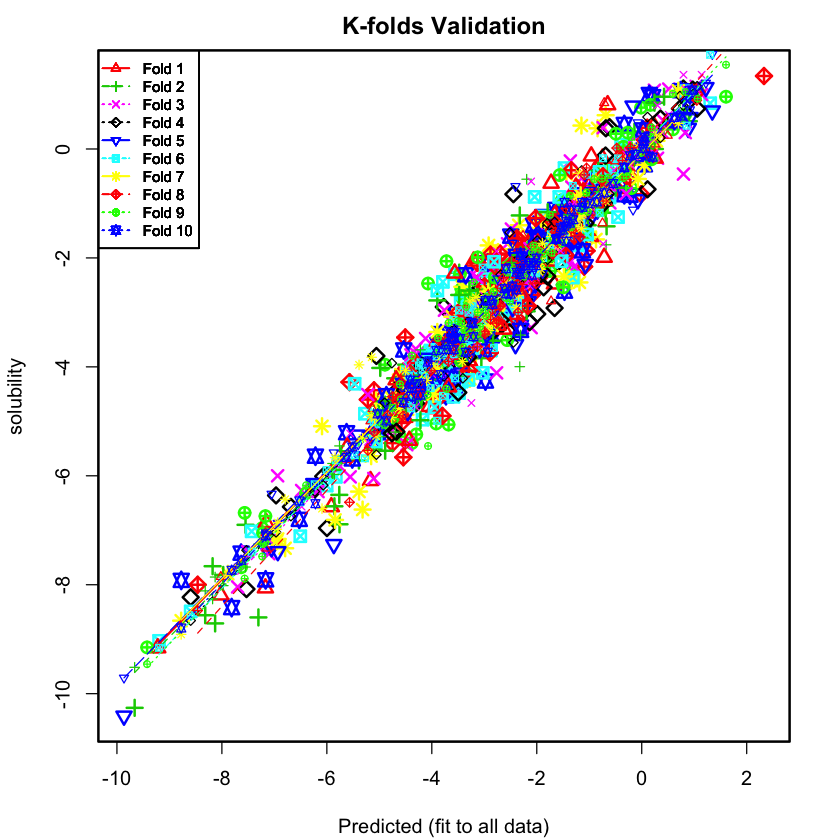

In [26]:
lm.allpred = lm(solubility ~., data=trainXfiltered)
#k-validation graphs
cvResults = cv.lm(trainXfiltered, lm.allpred, m=10, dots=FALSE, seed=MY_UID, legend.pos="topleft",  printit=FALSE, main="K-folds Validation")


cat('mean squared error (lower the better): ',attr(cvResults, 'ms'), '\n')

attr(cvResults, 'ms')